<a href="https://colab.research.google.com/github/pragmatic-ninja/human_pose/blob/master/Human_Pose_Module_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SVHN Dataset

## Download data

In [0]:
!mkdir -p /content/svhn_data
!wget -nc -q -O /content/svhn_data/train_32x32.mat http://ufldl.stanford.edu/housenumbers/train_32x32.mat
!wget -nc -q -O /content/svhn_data/test_32x32.mat http://ufldl.stanford.edu/housenumbers/test_32x32.mat

## Display sample data


Digit Label: 5


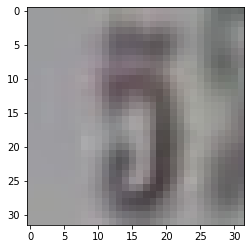

In [127]:
import scipy.io
import matplotlib.pyplot as plt

set_name = 'train' #@param ["train", "test"]
sample_num_slider = 232 #@param {type:"slider", min:0, max:1000, step:1}

mat = scipy.io.loadmat('./svhn_data/%s_32x32.mat' % set_name)
plt.imshow(mat['X'][:,:,:,sample_num_slider])
classification = mat['y'][sample_num_slider]
adj_classification = classification if classification != 10 else 0
print("Digit Label: %d" % adj_classification)

# COCO

## Download files

In [0]:
# This code downloads the coco dataset from Amazon S3 in parallel.
import boto3
from botocore import UNSIGNED
from botocore.client import Config
import multiprocessing
import subprocess
files = ['val2017.zip', 'annotations_trainval2017.zip']

s3 = boto3.client('s3', config=Config(signature_version=UNSIGNED))
def download_and_unzip_from_s3(file_name, bucket_name='fast-ai-coco'):
    dest_path = './coco/%s' % file_name
    print("Downloading", file_name)
    s3.download_file(bucket_name, file_name, dest_path)
    print("Finished downloading", file_name, ". Starting to unzip.")
    subprocess.run(["unzip", dest_path, '-d', './coco/'])
    print("Finished unzipping", file_name)

# Download in parallel
num_cpus = multiprocessing.cpu_count()
with multiprocessing.Pool(num_cpus) as p:
    p.map(download_and_unzip_from_s3, files)

print("Done transferring all datasets")

Finished downloading annotations_trainval2017.zip . Starting to unzip.
Finished downloading val2017.zip . Starting to unzip.
Finished unzipping annotations_trainval2017.zip
Finished unzipping val2017.zip
Done transferring all datasets


## Display sample data


Showing image: ./coco/val2017/000000425226.jpg



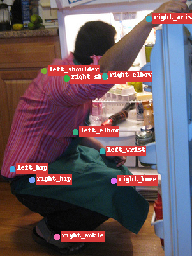

In [293]:
import json
from PIL import Image, ImageDraw, ImageFont
from IPython.core.display import display
import seaborn as sns

set_name = 'val2017' #@param ["val2017"]
sample_num_slider = 0 #@param {type:"slider", min:0, max:1000, step:1}

image_path = ""
keypoints_categories = []
bounding_box = []
keypoints = []
with open('./coco/annotations/person_keypoints_%s.json' % set_name) as json_file:
    data = json.load(json_file)
    image_def = data["annotations"][sample_num_slider]
    keypoints_categories = data["categories"][0]["keypoints"]
    image_path = "./coco/%s/%012d.jpg" % (set_name, image_def["image_id"])
    bounding_box = image_def["bbox"]
    keypoints = image_def["keypoints"]

print("Showing image: %s" % image_path)

im = Image.open(image_path)
x = bounding_box[0]
y = bounding_box[1]
width = bounding_box[2]
height = bounding_box[3]
box = (x, y,x+width, y+height)
legend = sns.color_palette("husl", len(keypoints_categories))

draw = ImageDraw.Draw(im)
font = ImageFont.load_default()
for i in range(len(keypoints_categories)):
  key_x = keypoints[i*3]
  key_y = keypoints[i*3+1]
  key_v = keypoints[i*3+2]
  if key_v > 0:
    point_color = (int(legend[i][0]*255), int(legend[i][1]*255),int(legend[i][2]*255))
    draw.ellipse((key_x-4, key_y-4, key_x+4, key_y+4), fill=point_color)
    text_bound = draw.textsize(keypoints_categories[i], font)
    draw.rectangle((key_x+6,key_y-8, key_x+text_bound[0]+8,key_y+text_bound[1]-4), (216,56,56,50))
    draw.text((key_x+8, key_y-8),keypoints_categories[i],font=font)
del draw

print()
adjust_image = im.crop(box).resize((192,256))
display(adjust_image)
   